# Census Users Conference 2025

This notebook accompanies the talk "The Shape of Census Data" by Dr Simon Rudkin. The examples are generated for this conference only. This notebook uses Python for the coding. A code book based on R is available on request from the author.

Examples of research papers using Census data with Topological Data Analysis Ball Mapper include:

Otway, A., & Rudkin, S. (2024). The Shape of Left-Behindedness: The 2019 UK General Election and Britain's Changing Electoral Geography. Available at SSRN 4877434.

Rudkin, S., Barros, L., Dłotko, P., & Qiu, W. (2024a). An economic topology of the Brexit vote. Regional Studies, 58(3), 601-618.

Rudkin, S., & Dlotko, P. (2024). A topology of inclusion: European regions and the digital divide. In 2024 Fourth International Conference on Digital Data Processing (DDP) (pp. 123-128). IEEE.

Rudkin, S., & Webber, D. J. (2023). Regional growth paths and regional resilience. Available at SSRN 4333276.

Tubadji, A., & Rudkin, S. (2025). Cultural gravity and redistribution of growth through migration: Cohesion lessons from spatial econometrics and topological data analysis. Papers in Regional Science, 104(1), 100064.


The first stage will be to load the required packages for analysis

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import kmapper as km
import pyballmapper as pbm
import statistics
import seaborn as sb

/Users/wanlingrudkin/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


I will also make use of a colour map for the presentation of the BallMapper graphs

In [117]:
from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm
hsvp = cm.get_cmap("gist_rainbow")

Next read in the two datasets that are used in the talk. There are three files in total for the talk. All files are available on the GitHub site

In [23]:
dta1 = pd.read_stata("mergedward.dta")
dtb1 = pd.read_stata("ax1.dta")
dtb2 = pd.read_stata("dty1.dta")

The data used in the talk is taken from the Census 2011 and Census 2021. The references for the data are as follows:

Office for National Statistics. (2021). 2021 Census: Topic Summaries. [Data collection]. Accessed via: https://www.nomisweb.co.uk/sources/census_2021_ts

Office for National Statistics. (2021). 2021 Census: Topic Summaries. [Data collection]. Accessed via: https://www.nomisweb.co.uk/sources/census_2021_ts [UPDATE]

Before progressing we will also read in the map files associated with the presentation. There are map files for both the ward level and constituency level datasets. Note that in order for this part of the code to work all 5 files with the same name are needed, not just the .shp file

In [3]:
gb_shapec = gpd.read_file('Westminster_Parliamentary_Constituencies__December_2019__Boundaries_UK_BFE.shp')
gb_shapew = gpd.read_file('WD_DEC_2021_UK_BFE.shp')

To verify the shape of the UK the map can be plotted. For example the parliamentary constituencies:

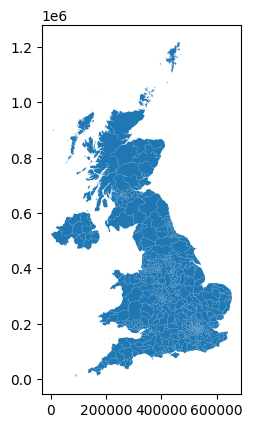

In [4]:
gb_shapec.plot(); plt.show()

The same can be done for the ward data

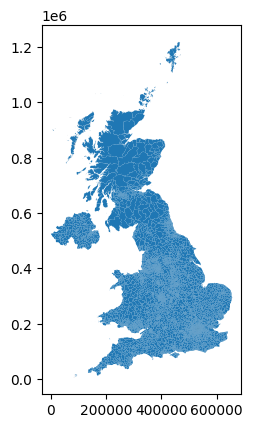

In [5]:
gb_shapew.plot(); plt.show()

The head of the data can be viewed using the .head() 

In [8]:
dta1.head()

,wdcd,car0,car1,car2,car3,a4,a5t9,a10t15,a16t19,a2024,...,unemp,retired,student,asian,black,mixed,white,other,female,disabled
0,E05000650,20.2,42.0,29.1,8.8,5.5,6.1,7.7,4.7,4.9,...,2.3,24.5,4.6,17.2,1.5,2.1,78.3,1.0,50.9,17.3
1,E05000651,16.1,41.3,32.8,9.8,4.5,5.9,7.7,4.4,3.9,...,2.2,33.3,3.5,1.4,1.3,3.1,93.6,0.6,51.7,18.6
2,E05000652,30.0,41.9,22.6,5.6,5.7,7.5,8.9,4.7,4.8,...,4.0,22.6,4.6,3.5,4.0,2.4,89.1,1.0,51.6,22.8
3,E05000653,11.5,41.5,36.3,10.7,4.2,5.3,7.3,4.2,4.3,...,1.9,28.8,3.7,1.6,0.2,1.7,96.1,0.3,51.7,15.0
4,E05000654,31.6,45.4,18.8,4.2,7.4,7.9,8.9,5.0,6.8,...,4.3,13.3,6.7,40.9,5.2,2.5,49.0,2.3,50.1,17.0


Notice that the first of the two files at the constituency level has already been reduced to just the variables in the TDA plot axes

In [11]:
dtb1.head()

,car011,car021,epart11,efull11,eself11,eunemployed11,eretired11,estudent11,epart21,efull21,...,hvg11,hg11,hf11,hb11,hvb11,hvg21,hg21,hf21,hb21,hvb21
0,15.8,15.593679,13.5,48.9,8.2,3.6,10.3,3.7,12.0,43.4,...,50.031755,35.648852,10.743635,2.774196,0.801563,42.280700,39.391695,13.891314,3.506814,0.929477
1,19.1,16.975497,14.7,38.2,8.7,4.6,18.7,3.9,12.3,34.1,...,42.684543,35.730247,15.264895,4.878271,1.442045,35.770562,39.515687,17.480382,5.537021,1.696349
2,16.0,14.763026,13.9,41.6,12.0,3.0,14.1,4.3,11.7,36.4,...,54.341502,30.666418,10.847802,3.236326,0.907952,48.249125,34.658762,12.364373,3.642726,1.085014
3,21.0,18.310940,14.6,40.2,8.3,4.3,17.0,3.3,12.6,35.8,...,42.414346,35.353823,15.776658,5.089722,1.365452,34.846950,39.839750,17.936753,5.814047,1.562500
4,10.3,9.325880,14.8,34.8,16.0,2.5,18.7,3.3,12.1,28.5,...,49.007371,34.832985,12.143893,3.123361,0.892389,43.219823,38.127374,13.949431,3.705999,0.997372


The codes to merge with the map can be found in the dtb2 data file

In [10]:
dtb2.head()

,ccd,n011,n111,n211,n311,n411,n511,n611,n711,n811,n021,n121,n221,n321,n421,n521,n621,n721,n821
0,E14000530,6.690939,10.719237,22.506122,15.479599,8.054004,8.086397,14.536338,9.927571,3.999793,4.921421,12.860016,20.880396,13.604916,9.432815,6.207865,13.233571,10.865144,7.993855
1,E14000531,6.162344,8.364719,20.294846,14.419456,9.358298,7.814125,15.916998,12.661860,5.007353,5.038687,10.547254,20.120289,13.125333,9.952072,6.391943,13.266297,13.606177,7.951947
2,E14000532,6.895702,18.794737,26.172950,14.107283,9.411134,4.993190,10.181992,6.111803,3.331208,6.171565,23.900812,24.218012,11.694883,10.074895,3.436340,7.972811,6.328907,6.201775
3,E14000533,5.294369,7.495262,17.870025,11.608180,9.139818,9.570826,17.189888,17.416091,4.415541,4.028904,9.574979,18.115401,11.290796,9.802954,7.797835,13.815860,17.975416,7.597856
4,E14000534,5.549608,14.691415,26.283962,13.005989,14.577125,5.750702,10.941524,6.860334,2.339342,4.811091,17.434467,24.397466,12.018547,15.403067,4.655006,9.134417,7.058256,5.087683


In [12]:
gb_shapec.head()

,pcon19cd,pcon19nm,bng_e,bng_n,long,lat,objectid_1,st_lengths,st_areasha,GlobalID,geometry
0,E14000530,Aldershot,484884,155126,-0.78410,51.288952,1,42197.661729,5.297816e+07,5cd0ebef-55fa-4715-8413-b6029fb4092c,"POLYGON ((483481.796 152923.695, 483479.1 1529..."
1,E14000531,Aldridge-Brownhills,404723,302568,-1.93166,52.620869,2,38590.177955,4.401655e+07,ca9e4e30-a733-4f91-b176-147692614cfb,"POLYGON ((404009.202 299236.404, 404006.201 29..."
2,E14000532,Altrincham and Sale West,374132,389051,-2.39049,53.397659,3,47809.300357,5.093050e+07,74335faa-86c0-4971-847c-3e473b13f4c4,"POLYGON ((377443.302 393344.296, 377451.596 39..."
3,E14000533,Amber Valley,440478,349675,-1.39770,53.042831,4,64666.586610,1.246464e+08,d7c3b021-820e-487a-bad0-ed56cac4c56a,"POLYGON ((436223.299 356984.804, 436246.303 35..."
4,E14000534,Arundel and South Downs,510686,115542,-0.42635,50.928711,5,231000.827361,6.465128e+08,37b1219f-d5fa-4edd-b159-fbd9b2641337,"POLYGON ((500835.003 129471.298, 500887.796 12..."


In [13]:
gb_shapew.head()

,WD21CD,WD21NM,WD21NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E05000026,Abbey,None,544433,184376,0.081276,51.5398,7dac90ac-56ba-4f45-af0a-2fe2e65fae0b,"POLYGON ((544333.288 184925.24, 544338.056 184..."
1,E05000027,Alibon,None,549247,185196,0.150987,51.5459,8286048f-4c05-4a93-a60b-654dda3c6092,"POLYGON ((547932.4 184916.598, 547944.8 184924..."
2,E05000028,Becontree,None,546860,185870,0.116869,51.5526,5b31c898-23f9-4fe1-8dcf-fc0f173d4f39,"POLYGON ((547387.751 187190.909, 547387.534 18..."
3,E05000029,Chadwell Heath,None,548266,189340,0.138596,51.5834,d5f9fb49-1bb4-439e-af52-0a5806f37d2d,"POLYGON ((548454.517 190807.659, 548518.617 19..."
4,E05000030,Eastbrook,None,550775,186271,0.173467,51.5552,d4e635ad-b92d-4cda-9e6e-b0da770c51f0,"POLYGON ((550393.357 187191.955, 550396.43 187..."


Merging with the map requires some adjustment of the data names. The types are also checked to ensure compatability. The merge is then performed

In [25]:
gb_shapew['WD21CD'] = gb_shapew['WD21CD'].astype(str)
dta1['WD21CD'] = dta1['wdcd'].astype(str)

gb_shapec['pcon19cd'] = gb_shapec['pcon19cd'].astype(str)
dtb2['pcon19cd'] = dtb2['ccd'].astype(str)

# Now try merging again
uk_wards = gb_shapew.merge(dta1, on='WD21CD')
uk_const = gb_shapec.merge(dtb2, on='pcon19cd')

To demonstrate that the focus becomes on England and Wales, the shape file is updated with a colouration. The colour here is the proportion of residents in the highest NSSEC class in 2021

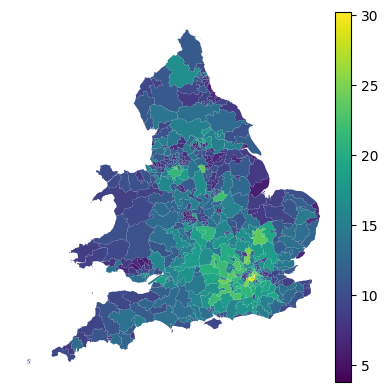

In [27]:
fig, ax = plt.subplots(1,1)
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",size="5%", pad=0.0)
uk_const.plot(column="n121",ax=ax,legend=True,cax=cax)
plt.show()

## Example 1: Constituency Changes in NSSEC

The data included at the consitituency level includes the proportion of residents in each constituency at each NSSEC classification. We can measure the change between the two periods. Here it must be remembered these are changes in percentage points and do not translate to numbers of people. Changes in population will have also changed the distribution of data.

To get an impression of the overall changes in NSSEC, a first bar chart with the averages in each classification is produced. The columns are named such that n011 means NSSEC group 0 in 2011. 

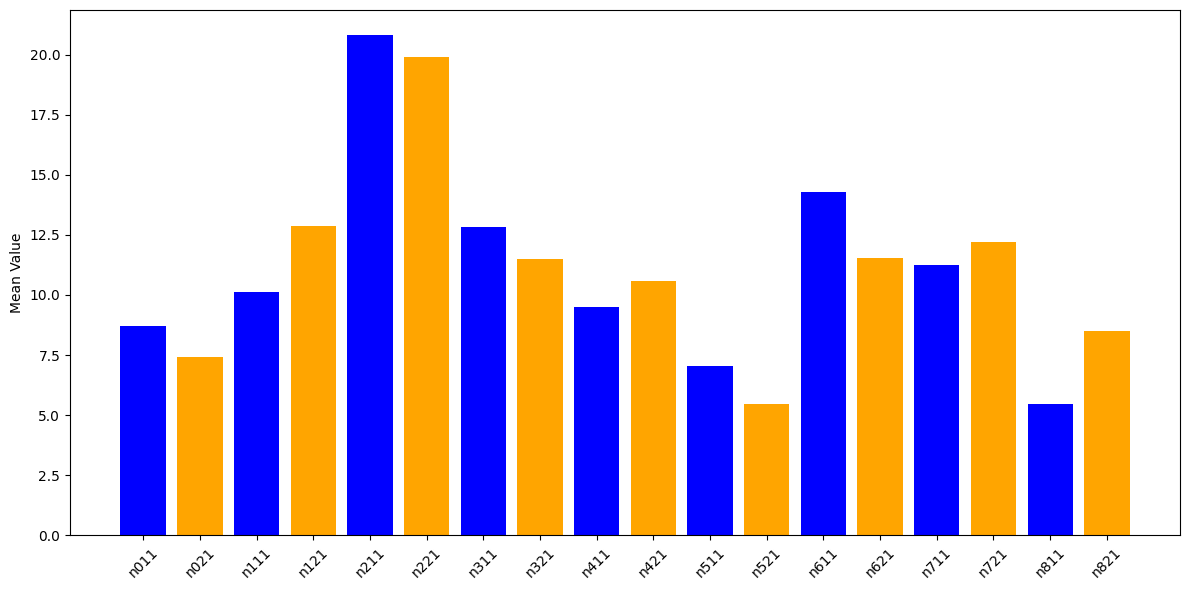

In [30]:
value_cols = [col for col in dtb2.columns if col != 'ccd']

# Filter columns ending in "11" or "21"
cols_11 = [col for col in value_cols if col.endswith("11")]
cols_21 = [col for col in value_cols if col.endswith("21")]

# Sort both lists to pair correctly (assumes consistent naming)
cols_11.sort()
cols_21.sort()

# Interleave columns: [n011, n021, n111, n121, ...]
interleaved_cols = [col for pair in zip(cols_11, cols_21) for col in pair]

# Create a mean across rows for each column
means = dtb2[interleaved_cols].mean()

# Assign colors: "11" columns → blue, "21" columns → orange
colors = ['blue' if col.endswith("11") else 'orange' for col in interleaved_cols]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(range(len(means)), means, color=colors)
plt.xticks(ticks=range(len(means)), labels=interleaved_cols, rotation=45)
plt.ylabel("Mean Value")
plt.title("")
plt.tight_layout()
plt.show()

Construct the changes

In [32]:
dtb2['dn0'] = dtb2['n021']-dtb2['n011']
dtb2['dn1'] = dtb2['n121']-dtb2['n111']
dtb2['dn2'] = dtb2['n221']-dtb2['n211']
dtb2['dn3'] = dtb2['n321']-dtb2['n311']
dtb2['dn4'] = dtb2['n421']-dtb2['n411']
dtb2['dn5'] = dtb2['n521']-dtb2['n511']
dtb2['dn6'] = dtb2['n621']-dtb2['n611']
dtb2['dn7'] = dtb2['n721']-dtb2['n711']
dtb2['dn8'] = dtb2['n821']-dtb2['n811']

These changes are the focus of the example research question. The next step is to create scatter plots that relate the changes in NSSEC to the explanatory variables. However, because we have so many variables, let us select a subset to use.

In [34]:
dtb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car011         573 non-null    float64
 1   car021         573 non-null    float64
 2   epart11        573 non-null    float64
 3   efull11        573 non-null    float64
 4   eself11        573 non-null    float64
 5   eunemployed11  573 non-null    float64
 6   eretired11     573 non-null    float64
 7   estudent11     573 non-null    float64
 8   epart21        573 non-null    float64
 9   efull21        573 non-null    float64
 10  eself21        573 non-null    float64
 11  eunemployed21  573 non-null    float64
 12  eretired21     573 non-null    float64
 13  estudent21     573 non-null    float64
 14  q011           573 non-null    float64
 15  q111           573 non-null    float64
 16  q211           573 non-null    float64
 17  qa11           573 non-null    float64
 18  q311      

The reduced set of variables will focus on 2021. It would be possible to also use the difference between 2021 and 2011. The reduced set is now constructed

In [38]:
dtb3 = dtb1[['car021','efull21','hvg21','q421','soc21']]

These reduced variables are appended to the outcome variables dtb2['dn0']

In [39]:
dtb4 = pd.concat([dtb2, dtb3], axis=1)

First construct a scatter plot with one of the 5 variables in dtb3 on the horizontal axis and the change in NSSEC1 on the vertical axis

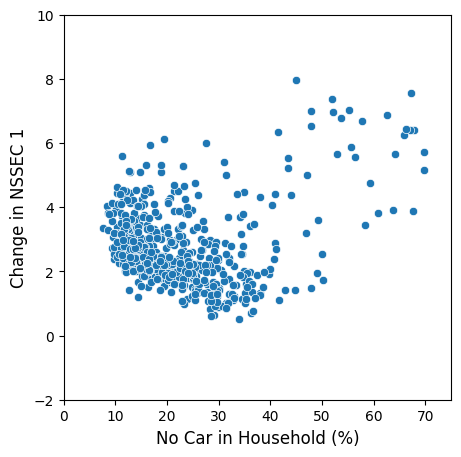

In [42]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = dtb4['car021'] , y = dtb4['dn1'] , data = dtb4 ) 

ax.set_xlabel( "No Car in Household (%)" , size = 12 ) 
ax.set_ylabel( "Change in NSSEC 1" , size = 12 ) 

ax.set_xlim(0,75)
ax.set_ylim(-2,10)
 
plt.show()

Next the percentage of households which are socially rented

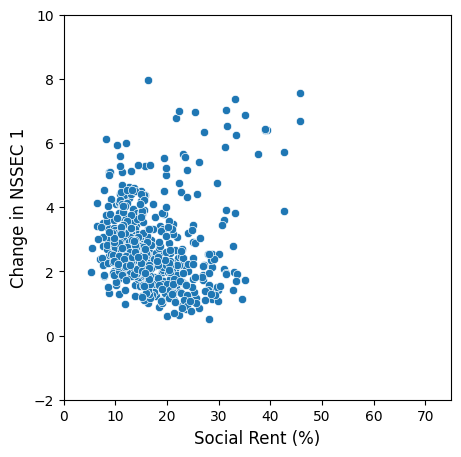

In [43]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = dtb4['soc21'] , y = dtb4['dn1'] , data = dtb4 ) 

ax.set_xlabel( "Social Rent (%)" , size = 12 ) 
ax.set_ylabel( "Change in NSSEC 1" , size = 12 ) 

ax.set_xlim(0,75)
ax.set_ylim(-2,10)
 
plt.show()

Finally, the case when the horizontal axis is the proportion of highly educated

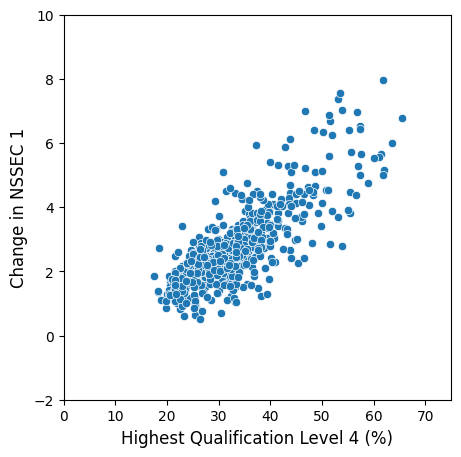

In [115]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = dtb4['q421'] , y = dtb4['dn1'] , data = dtb4 ) 

ax.set_xlabel( "Highest Qualification Level 4 (%)" , size = 12 ) 
ax.set_ylabel( "Change in NSSEC 1" , size = 12 ) 

ax.set_xlim(0,75)
ax.set_ylim(-2,10)
 
plt.show() 

The scatter plots show that the relationships are broadly as expected, but that there are certain constituencies in which the expected relationships between the characteristics and the rise in NSSEC1 proportions is not as expected. The divergence is evident in the top right of the first two plots.

We create a full set of dummies for whether the increase in each NSSEC class is larger than 2%. The thresholds are then updated based on the average

In [84]:
dtb4['dn0p'] = (dtb4["dn0"]>0)*1
dtb4['dn1p'] = (dtb4["dn1"]>2)*1
dtb4['dn2p'] = (dtb4["dn2"]>0)*1
dtb4['dn3p'] = (dtb4["dn3"]>0)*1
dtb4['dn4p'] = (dtb4["dn4"]>1)*1
dtb4['dn5p'] = (dtb4["dn5"]>-2)*1
dtb4['dn6p'] = (dtb4["dn6"]>-2)*1
dtb4['dn7p'] = (dtb4["dn7"]>1)*1
dtb4['dn8p'] = (dtb4["dn8"]>3)*1


A quick check will confirm which of these variables are always 1 (or 0). Update the example code for other NSSEC levels

In [85]:
dtb4['dn8p'].describe()

count    573.000000
mean       0.492147
std        0.500375
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: dn8p, dtype: float64

The 2 threshold for the proportion in the "other" category does not produce many 1's so reduce to 0

The hue property allows the plotting of scatter plots in which there are two of the explanatory variables and the outcome links to another variable. In this case a binary variable for the proportion of NSSEC 1 respondents rising by 2 percentage points

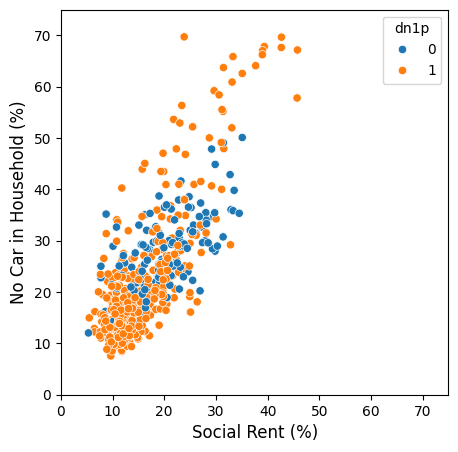

In [87]:
fig, ax = plt.subplots(figsize = ( 5 , 5 )) 
sb.scatterplot( ax = ax , x = dtb4['soc21'] , y = dtb4['car021'] , data = dtb4, hue = dtb4['dn1p'] ) 

ax.set_xlabel( "Social Rent (%)" , size = 12 ) 
ax.set_ylabel( "No Car in Household (%)" , size = 12 ) 

ax.set_xlim(0,75)
ax.set_ylim(0,75)
 
plt.show()

To obtain a fuller picture of the distribution of the variables a pairplot can be used. However, these pairplots only show a maximum of two axis variables in any one panel.

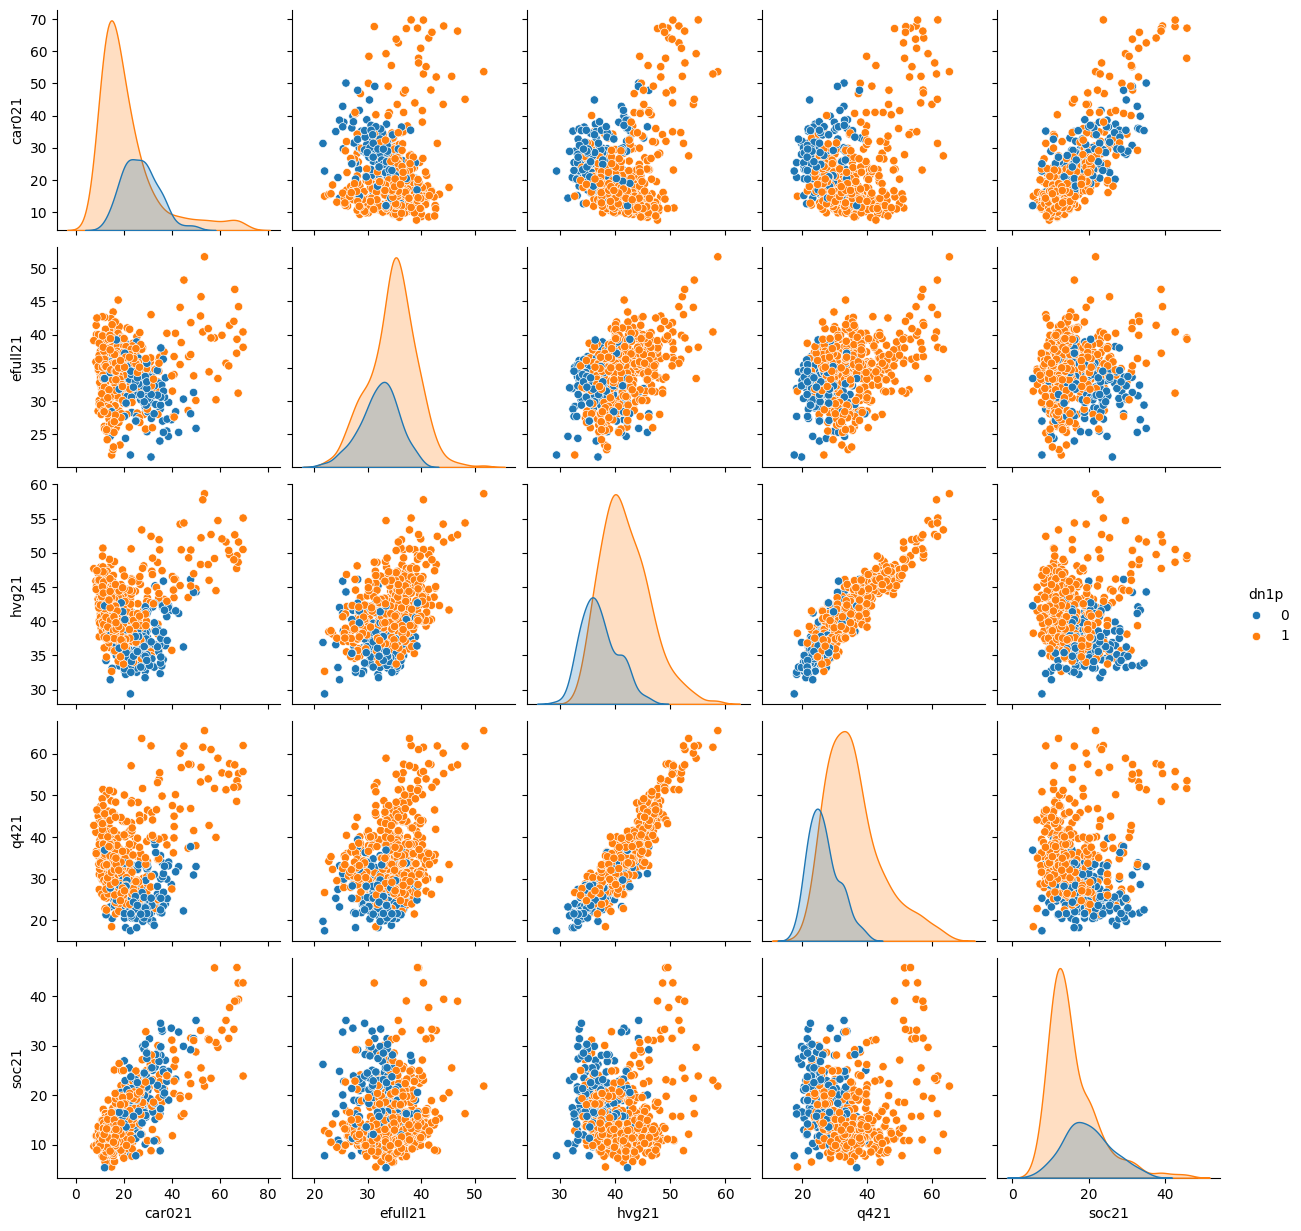

In [ ]:
dtb5 = dtb4[['car021','efull21','hvg21','q421','soc21','dn1p']]

sb.pairplot(dtb5,hue='dn1p')

We also generate a summary statistics matrix for the reduced dataset. 

'car021','efull21','hvg21','q421','soc21','dn1p'

In [116]:
dtb5.describe()

,car021,efull21,hvg21,q421,soc21,dn1p
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,22.847615,33.968237,40.551536,33.295915,16.871295,0.727749
std,11.552783,4.345314,4.648821,8.895236,6.763433,0.445507
min,7.562830,21.600000,29.375654,17.495865,5.333430,0.000000
25%,14.559524,31.200000,37.144144,26.789531,11.847385,0.000000
50%,20.072370,34.300000,40.095050,31.962568,15.167182,1.000000
75%,27.697993,36.700000,43.410591,37.369746,20.377321,1.000000
max,69.715282,51.700000,58.625337,65.492672,45.782952,1.000000


In order to make the BallMapper plots match with those in the published papers, a further colour map is imported. This step also appears earlier in the notebook. 

In [90]:
hsvp = cm.get_cmap("gist_rainbow")

Now it is possible to implement the TDABM plot. The plot constructed here has 5 axes. The colouration is brought in as the cdf (Coloring Data Frame). The radius selected provides an appropriate representation of the data. A smaller radius would increase the number of balls and result in a difficult to inerpret mass. Larger radii lose much of the information on the local sturcture. You can cahange the eps to see the effects.

/Users/wanlingrudkin/Library/Python/3.9/lib/python/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

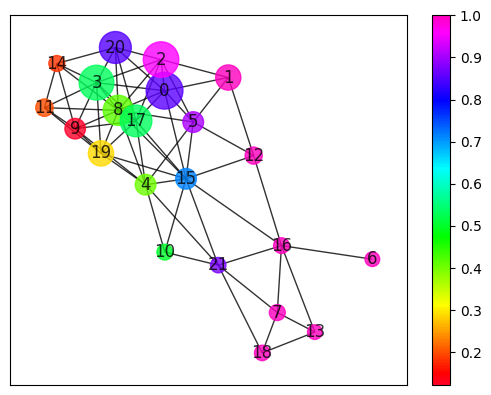

In [93]:
xdf = dtb4[['car021','efull21','hvg21','q421','soc21']] 
cdf = pd.DataFrame(dtb4['dn1p'])

bm1=pbm.BallMapper(X=xdf, eps=14, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='dn1p', color_palette=hsvp, colorbar=True)

A second plot is generated with the same variables, but now the coloration is the proportion of constituencies within the ball where the proportion of "other" has risen (dn0 > 0)

/Users/wanlingrudkin/Library/Python/3.9/lib/python/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

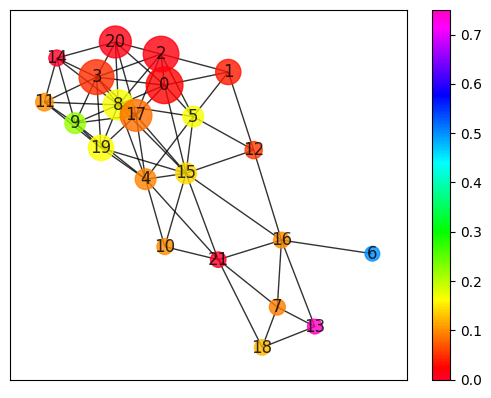

In [95]:
xdf = dtb4[['car021','efull21','hvg21','q421','soc21']] 
cdf = pd.DataFrame(dtb4['dn0p'])

bm1=pbm.BallMapper(X=xdf, eps=14, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='dn0p', color_palette=hsvp, colorbar=True)

It is possible to use the axis variables as the colours. For example the proportion of households with no car access and the proportions of social rent. Two further TDABM plots are generated here

/Users/wanlingrudkin/Library/Python/3.9/lib/python/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

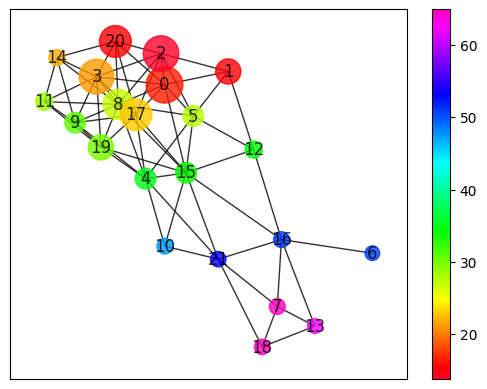

In [118]:
xdf = dtb4[['car021','efull21','hvg21','q421','soc21']] 
cdf = pd.DataFrame(dtb4['car021'])

bm1=pbm.BallMapper(X=xdf, eps=14, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='car021', color_palette=hsvp, colorbar=True)

/Users/wanlingrudkin/Library/Python/3.9/lib/python/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

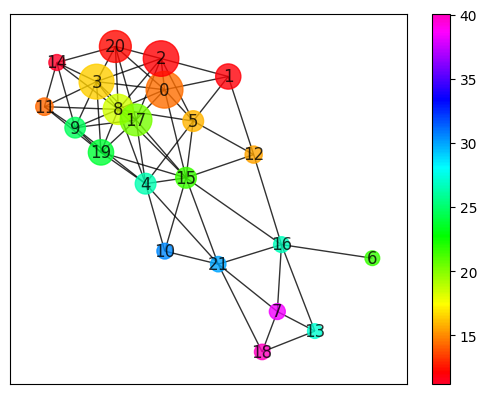

In [119]:
xdf = dtb4[['car021','efull21','hvg21','q421','soc21']] 
cdf = pd.DataFrame(dtb4['soc21'])

bm1=pbm.BallMapper(X=xdf, eps=14, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='soc21', color_palette=hsvp, colorbar=True)

The increase in NSSEC 0 is of interest, as the areas with increases are concentrated in a small set of balls. Those balls to the lower right merit further investigation.

To see these balls let us apply yhe points_and_balls function. This function generates a  list of points and the balls they are in. The generated list can be merged into the main dataset in a comparatively straightforward fashion to help with further inference

In [96]:
pb1 = bm1.points_and_balls()

A point variable is added to the data for merging. I also join in all of the elements of the dataset to allow further inference

In [101]:
uk_const['point'] = uk_const.index
uk_const = pd.concat([uk_const, dtb3], axis=1)

Merging with the points_and_balls information can then be performed

In [102]:
uk_const2 = uk_const.merge(pb1, on='point')

A view of the head of the data confirms that the link has been made. 

In [99]:
uk_const2.head()

,pcon19cd,pcon19nm,bng_e,bng_n,long,lat,objectid_1,st_lengths,st_areasha,GlobalID,...,n121,n221,n321,n421,n521,n621,n721,n821,point,ball
0,E14000530,Aldershot,484884,155126,-0.78410,51.288952,1,42197.661729,5.297816e+07,5cd0ebef-55fa-4715-8413-b6029fb4092c,...,12.860016,20.880396,13.604916,9.432815,6.207865,13.233571,10.865144,7.993855,0,0
1,E14000531,Aldridge-Brownhills,404723,302568,-1.93166,52.620869,2,38590.177955,4.401655e+07,ca9e4e30-a733-4f91-b176-147692614cfb,...,10.547254,20.120289,13.125333,9.952072,6.391943,13.266297,13.606177,7.951947,1,0
2,E14000531,Aldridge-Brownhills,404723,302568,-1.93166,52.620869,2,38590.177955,4.401655e+07,ca9e4e30-a733-4f91-b176-147692614cfb,...,10.547254,20.120289,13.125333,9.952072,6.391943,13.266297,13.606177,7.951947,1,3
3,E14000531,Aldridge-Brownhills,404723,302568,-1.93166,52.620869,2,38590.177955,4.401655e+07,ca9e4e30-a733-4f91-b176-147692614cfb,...,10.547254,20.120289,13.125333,9.952072,6.391943,13.266297,13.606177,7.951947,1,17
4,E14000531,Aldridge-Brownhills,404723,302568,-1.93166,52.620869,2,38590.177955,4.401655e+07,ca9e4e30-a733-4f91-b176-147692614cfb,...,10.547254,20.120289,13.125333,9.952072,6.391943,13.266297,13.606177,7.951947,1,20


The merged dataset is large. We are only interested in a subset of these variables. A new dataframe is created. Note that the name is brought across as the name allows us to say more about the constituencies that are within each ball

In [104]:
uk_const3 = uk_const2[['ball','point','pcon19nm','n811','n821','car021','efull21','hvg21','q421','soc21']]

To focus on Ball 6, the subset function can be used

In [113]:
uk_const6 = uk_const3[uk_const3["ball"] == 6]

The points within Ball 6 can then be listed by simply calling uk_const6

In [114]:
uk_const6

,ball,point,pcon19nm,n811,n821,car021,efull21,hvg21,q421,soc21
43,6,19,Battersea,4.709518,6.378825,53.632743,51.7,58.625337,65.492672,21.825457
247,6,99,Chelsea and Fulham,5.740809,8.131043,52.930923,40.4,57.737874,61.512155,23.018316
1130,6,448,Streatham,7.380012,7.982661,52.190933,45.7,52.183402,56.717289,25.496987
1182,6,468,Tooting,6.204062,7.204075,45.062911,48.2,54.353374,61.774900,16.248038


These are suburbs to the south of London. A high proportion of highly qualified individuals can be seen, as can the higher percentage of car ownership. These areas have undergone substantial gentrification in recent times. 

In [109]:
uk_const13 = uk_const3[uk_const3["ball"] == 13]

Viewing the list of constituencies is then done in the usual way

In [110]:
uk_const13

,ball,point,pcon19nm,n811,n821,car021,efull21,hvg21,q421,soc21
267,13,109,Cities of London and Westminster,6.892374,9.394986,69.715282,38.1,55.074356,61.915774,23.856229
499,13,197,Hampstead and Kilburn,6.932578,9.313565,56.353109,39.5,52.662339,60.955895,23.403031
599,13,238,Kensington,7.602822,10.814859,59.219643,33.4,54.694623,58.882366,29.650562
1271,13,506,Westminster North,11.652197,13.585648,63.735661,35.3,50.332839,55.036175,31.466104


Finally, look at the other end of the plot by considering Ball 1

In [111]:
uk_const1 = uk_const3[uk_const3["ball"] == 1]

The list is then created below. Because this is a longer list it is necessary to view the list as a scrollable element

In [112]:
uk_const1

,ball,point,pcon19nm,n811,n821,car021,efull21,hvg21,q421,soc21
5,1,2,Altrincham and Sale West,3.331208,6.201775,14.763026,36.4,48.249125,48.656916,11.370327
44,1,20,Beaconsfield,2.658953,5.807148,10.245409,35.2,47.041642,43.782110,11.693149
46,1,21,Beckenham,3.137606,5.730728,19.498095,37.2,47.483615,43.804449,8.107114
182,1,74,Bromley and Chislehurst,4.621348,7.147444,23.195664,37.4,46.187412,43.378720,15.660639
185,1,75,Bromsgrove,3.210583,5.933342,11.376085,34.8,42.753391,36.618537,10.714805
...,...,...,...,...,...,...,...,...,...,...
1296,1,517,Woking,3.879693,6.068773,14.295155,39.9,46.208292,43.976025,11.409365
1297,1,518,Wokingham,2.576780,4.438431,8.843610,42.5,47.368033,46.475017,8.892492
1315,1,526,Wycombe,5.652246,7.809413,14.344402,37.7,44.354564,38.211373,13.990966
1345,1,538,Gower,3.446984,6.789056,13.871690,31.7,43.091816,37.694541,11.328159


The results have been based upon a small subset of the data. A bigger set may be used, or different categories from within the same set. Let us first consider what happens when 5 different variables are selected. The next block moves quickly through the elements.

/Users/wanlingrudkin/Library/Python/3.9/lib/python/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

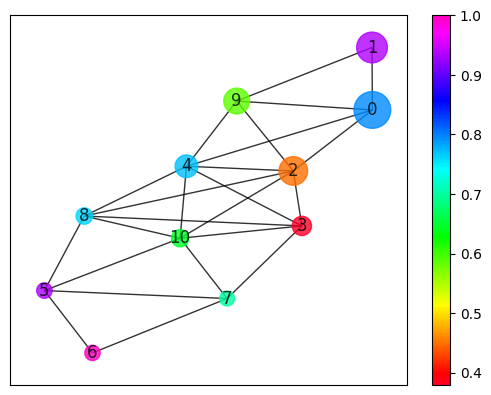

In [122]:
dtb3 = dtb1[['car021','epart21','hg21','q021','own21']] 
dtb4 = pd.concat([dtb2, dtb3], axis=1)

dtb4['dn0p'] = (dtb4["dn0"]>0)*1
dtb4['dn1p'] = (dtb4["dn1"]>2)*1
dtb4['dn2p'] = (dtb4["dn2"]>0)*1
dtb4['dn3p'] = (dtb4["dn3"]>0)*1
dtb4['dn4p'] = (dtb4["dn4"]>1)*1
dtb4['dn5p'] = (dtb4["dn5"]>-2)*1
dtb4['dn6p'] = (dtb4["dn6"]>-2)*1
dtb4['dn7p'] = (dtb4["dn7"]>1)*1
dtb4['dn8p'] = (dtb4["dn8"]>3)*1

xdf = dtb4[['car021','epart21','hg21','q021','own21']] 
cdf = pd.DataFrame(dtb4['dn1p'])

bm1=pbm.BallMapper(X=xdf, eps=14, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='dn1p', color_palette=hsvp, colorbar=True)

The shape and inference remains similar for this case. Balls 2 and 3 align with Balls 11, 9 and others to the top left of the previous plot. 

A third example may be created using a larger dataset

/Users/wanlingrudkin/Library/Python/3.9/lib/python/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

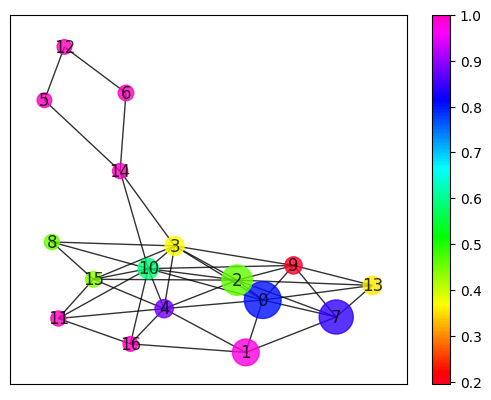

In [125]:
dtb3 = dtb1[['car021','epart21','efull21','estudent21','hvg21','hg21','q021','q421','own21','soc21','priv21']] 
dtb4 = pd.concat([dtb2, dtb3], axis=1)

dtb4['dn0p'] = (dtb4["dn0"]>0)*1
dtb4['dn1p'] = (dtb4["dn1"]>2)*1
dtb4['dn2p'] = (dtb4["dn2"]>0)*1
dtb4['dn3p'] = (dtb4["dn3"]>0)*1
dtb4['dn4p'] = (dtb4["dn4"]>1)*1
dtb4['dn5p'] = (dtb4["dn5"]>-2)*1
dtb4['dn6p'] = (dtb4["dn6"]>-2)*1
dtb4['dn7p'] = (dtb4["dn7"]>1)*1
dtb4['dn8p'] = (dtb4["dn8"]>3)*1

xdf = dtb4[['car021','epart21','efull21','estudent21','hvg21','hg21','q021','q421','own21','soc21','priv21']] 
cdf = pd.DataFrame(dtb4['dn1p'])

bm1=pbm.BallMapper(X=xdf, eps=21, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='dn1p', color_palette=hsvp, colorbar=True)

In [126]:
pb1 = bm1.points_and_balls()

uk_const2a = uk_const.merge(pb1, on='point')
uk_const3a = uk_const2a[['ball','point','pcon19nm','n111','n121']]

In [128]:
uk_const12a = uk_const3a[uk_const3a["ball"] == 12]
uk_const12a

,ball,point,pcon19nm,n111,n121
236,12,109,Cities of London and Westminster,23.775690,28.949523
447,12,196,Hammersmith,16.511910,20.324081
449,12,197,Hampstead and Kilburn,21.204199,26.758703
537,12,238,Kensington,20.702706,25.458044
795,12,352,Poplar and Limehouse,16.945768,23.201578
1145,12,506,Westminster North,18.872590,22.798734


In [129]:
uk_const06a = uk_const3a[uk_const3a["ball"] == 6]
uk_const06a

,ball,point,pcon19nm,n111,n121
44,6,23,Bermondsey and Old Southwark,16.632091,23.042769
47,6,25,Bethnal Green and Bow,11.810790,18.229224
182,6,85,Camberwell and Peckham,9.736627,16.426268
434,6,190,Hackney North and Stoke Newington,11.204549,18.077167
435,6,191,Hackney South and Shoreditch,11.480938,19.048168
446,6,196,Hammersmith,16.511910,20.324081
500,6,220,Holborn and St Pancras,15.459188,19.330718
529,6,233,Islington North,16.954019,22.613779
530,6,234,Islington South and Finsbury,19.142960,24.875312
536,6,238,Kensington,20.702706,25.458044


In [130]:
uk_const05a = uk_const3a[uk_const3a["ball"] == 5]
uk_const05a

,ball,point,pcon19nm,n111,n121
38,5,19,Battersea,23.393067,30.186697
212,5,99,Chelsea and Fulham,22.631095,28.284760
448,5,197,Hampstead and Kilburn,21.204199,26.758703
808,5,357,Putney,20.362289,25.909623
1021,5,448,Streatham,15.125947,22.107455
1068,5,468,Tooting,18.476383,26.441316


In [131]:
uk_const14a = uk_const3a[uk_const3a["ball"] == 14]
uk_const14a

,ball,point,pcon19nm,n111,n121
213,14,99,Chelsea and Fulham,22.631095,28.284760
323,14,143,Dulwich and West Norwood,16.037599,22.578129
431,14,188,Greenwich and Woolwich,13.493513,20.877217
503,14,222,Hornsey and Wood Green,17.110317,22.113920
573,14,257,Lewisham East,11.008791,15.425440
574,14,258,Lewisham West and Penge,12.029568,18.383852
576,14,259,"Lewisham, Deptford",11.136114,18.181300
578,14,260,Leyton and Wanstead,10.155607,15.376213
809,14,357,Putney,20.362289,25.909623
1022,14,448,Streatham,15.125947,22.107455


The balls in the flare share much in common with the flare in the original plot. The additional variables have separated out more of the London suburbs, but the inference remains the same. 

The selection of axes for TDABM is important, but the inference is necessarily similar since the raw data is the same. This example is designed to inspire work, rather than being a piece of work in its own right. Users are encouraged to explore the messages within the Constituency data.

## Ward Data Example